# Evaluation of Classification Metrics in Predicting Diabetes


In this assignment, we will embark on a detailed analysis of classification metrics to assess the performance of a diabetes prediction model. We will be utilizing a dataset hosted on GitHub that contains several clinical variables along with labels indicating the presence or absence of diabetes.

The core objectives of this project include:

Confusion Matrix Creation: Generate a confusion matrix from our model's predictions to lay the groundwork for further evaluation metrics.
Metric Calculation: Develop Python functions to calculate essential metrics such as accuracy, precision, sensitivity, specificity, F1 Score, ROC, and AUC.
Validation: Validate the correctness of our custom functions by comparing their outputs with established Python libraries like scikit-learn.
Here's a breakdown of the assignment:

Data Loading and Preliminary Analysis: We will start by importing the necessary Python libraries and loading the dataset. This step is crucial for understanding the data's structure and preparing it for analysis.
Confusion Matrix Computation: Using the Pandas library, we will compute the confusion matrix to visualize the true positives, true negatives, false positives, and false negatives. This matrix is fundamental in understanding the model's classification behavior.
Metric Calculation Functions: We will write Python functions to calculate the following metrics:
Accuracy: The proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.
Precision: The ratio of correct positive predictions to the total predicted positives.
Sensitivity (Recall): The proportion of actual positives correctly identified as such.
Specificity: The proportion of actual negatives that were correctly identified.
F1 Score: The harmonic mean of precision and recall, providing a balance between the two in scenarios where one may be more important than the other.
ROC and AUC: Plot the Receiver Operating Characteristic curve and calculate the Area Under the Curve, which illustrates the model's capability to discriminate between classes at various threshold levels.
Validation of Metrics: We will validate our custom functions by comparing the results with those obtained from the scikit-learn library, ensuring accuracy in our calculations.
ROC Curve Plotting and AUC Calculation: Using both our custom function and scikit-learn, we will plot the ROC curve and calculate the AUC. This comparison helps verify the correctness of our ROC implementation and understand the model's diagnostic ability.

By the end of this assignment, we aim to have a robust set of tools and metrics that accurately evaluate the effectiveness of a diabetes prediction model. This will not only enhance our understanding of model evaluation techniques but also contribute to better predictive modeling in healthcare applications.

We're importing the Pandas library and then loading a dataset from a remote GitHub repository. We're also printing the first few rows of the dataset to get an initial look at its structure.

In [1]:
import pandas as pd

# Load the data from GitHub
url = "https://raw.githubusercontent.com/Vijayasuriya/M5-DS/main/M5_Data.csv"
data = pd.read_csv(url)

# Display the first few rows of the data to understand its structure
print(data.head())

   pregnant  glucose  diastolic  skinfold  insulin   bmi  pedigree  age  \
0         7      124         70        33      215  25.5     0.161   37   
1         2      122         76        27      200  35.9     0.483   26   
2         3      107         62        13       48  22.9     0.678   23   
3         1       91         64        24        0  29.2     0.192   21   
4         4       83         86        19        0  29.3     0.317   34   

   class  scored.class  scored.probability  
0      0             0            0.328452  
1      0             0            0.273190  
2      1             0            0.109660  
3      0             0            0.055998  
4      0             0            0.100491  


# 3.confusion matrix

We're calculating a confusion matrix using the Pandas crosstab() function. This matrix helps us evaluate the performance of a classification model. We display the resulting confusion matrix.

In [2]:
actual_counts = data['class'].value_counts()
predicted_counts = data['scored.class'].value_counts()

print("Actual Value Counts:")
print(actual_counts)

print("\nPredicted Value Counts:")
print(predicted_counts)


Actual Value Counts:
0    124
1     57
Name: class, dtype: int64

Predicted Value Counts:
0    149
1     32
Name: scored.class, dtype: int64


In [3]:

confusion_matrix = pd.crosstab(data['class'], data['scored.class'],rownames=['Actual'], colnames=['Predicted'])

# Display the confusion matrix
confusion_matrix


Predicted,0,1
Actual,,
0,119,5
1,30,27


This code calculates the confusion matrix, which contains four important values for evaluating classification models: True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN). We extract these values from the matrix and print them.

# 4.Extract the individual confusion matrix values

In [4]:
# Extract individual values
TP = confusion_matrix.loc[1, 1]
FP = confusion_matrix.loc[0, 1]
TN = confusion_matrix.loc[0, 0]
FN = confusion_matrix.loc[1, 0]

# Print the individual values
print("True Positive (TP):", TP)
print("False Positive (FP):", FP)
print("True Negative (TN):", TN)
print("False Negative (FN):", FN)

True Positive (TP): 27
False Positive (FP): 5
True Negative (TN): 119
False Negative (FN): 30


# 5. accuracy metric

This code defines a Python function for calculating the accuracy metric for binary classification. The function takes two lists or arrays, 'actual' and 'predicted', as input. It calculates accuracy by comparing each corresponding pair of actual and predicted labels, counting the correct predictions, and dividing by the total number of predictions. Finally, it prints the accuracy score.

In [5]:
def calculate_accuracy(actual, predicted):
    """
    Calculate accuracy for binary classification.

    Args:
    actual (list or array): True labels (0 or 1).
    predicted (list or array): Predicted labels (0 or 1).

    Returns:
    float: Accuracy score (between 0 and 1).
    """
    # Check that actual and predicted have the same length
    if len(actual) != len(predicted):
        raise ValueError("Input lists must have the same length.")

    # Calculate accuracy
    correct_predictions = sum(1 for a, p in zip(actual, predicted) if a == p)
    total_predictions = len(actual)
    accuracy = correct_predictions / total_predictions

    return accuracy

#Example usage:
actual_labels = [1, 0, 1, 0, 1]
predicted_labels = [1, 0, 1, 1, 0]
accuracy = calculate_accuracy(actual_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.6


# 6. precision metric
The precision tells what proportion of positive value that we predict, are actually positive.  
precision = TP / ( TP + FP )

In [22]:
def get_prec(actual,predict):
    matrix = pd.crosstab(predict,actual)
    matrix.columns = pd.Series(['Negative','Positive'],name='Actual')
    matrix.index = pd.Series(['Negative','Positive'],name='Predicted')
    TP = matrix['Positive']['Positive']
    FP = matrix['Negative']['Positive']
    prec = TP/(TP+FP)
    return prec
get_prec(data['class'],data['scored.class'])

0.84375

The precision metric is 0.84375, which means for all positive values predicted by the model, the probability of correctly is 84.375%.

# 7.sensitivity metric
The sensitivity metric tells what proportion of positive values are diagnosed by the algorithm as positive.   
It is also called Recall metric.  
sensitivity metric = TP / (TP+FN)

In [7]:
def get_sens(actual,predict):
    matrix = pd.crosstab(predict,actual)
    matrix.columns = pd.Series(['Negative','Positive'],name='Actual')
    matrix.index = pd.Series(['Negative','Positive'],name='Predicted')
    TP = matrix['Positive']['Positive']
    FN = matrix['Positive']['Negative']
    sens = TP / (TP+FN)
    return sens
get_sens(data['class'],data['scored.class'])

0.47368421052631576

The sensitivity metric is about 0.47368, which means for all actual positive values, the probability of rightly predicting is about 47.368%.

# 8.specificity metric
The specificity tells what proportion of negative values were predicted by the model as negative. It is the exact opposite of Recall metric.  
Specificity metric = TN/(TN+FP)

In [20]:
def get_spec(actual,predict):
    matrix = pd.crosstab(predict,actual)
    matrix.columns = pd.Series(['Negative','Positive'],name='Actual')
    matrix.index = pd.Series(['Negative','Positive'],name='Predicted')
    TN = matrix['Negative']['Negative']
    FP = matrix['Negative']['Positive']
    spec = TN/(TN+FP)
    return spec
get_spec(data['class'],data['scored.class'])

0.9596774193548387

The specificity metric is about 0.95968, which means for all actual negative values, the probability of rightly predicting is about 95.968%. 

# 9. F1 Score metric
The F1 score is a single score that kind of represents both Precision(P) and Recall(R) by using harmonic mean.  
It need Precision and Recall metrics, so I can use previous self-defined functions.  
F1 score = 2xPxR/P+R. 

In [21]:
def get_F1(actual,predict):
    matrix = pd.crosstab(predict,actual)
    matrix.columns = pd.Series(['Negative','Positive'],name='Actual')
    matrix.index = pd.Series(['Negative','Positive'],name='Predicted')
    prec = get_prec(actual,predict)
    rec = get_sens(actual,predict)
    F1 = 2 * prec * rec / (prec + rec)
    return F1
get_F1(data['class'],data['scored.class'])

0.6067415730337079

The F1 score metric of the model is about 0.6.

# 10.  ROC curve and  AUC

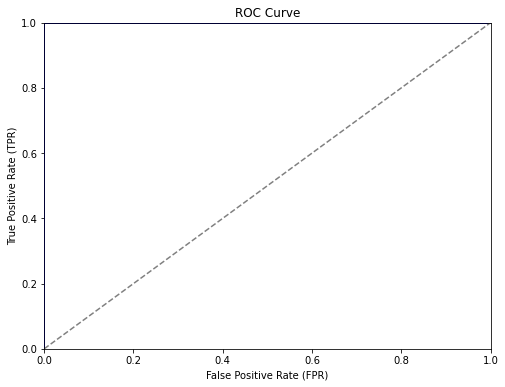

AUC: 1.0


In [14]:
import matplotlib.pyplot as plt

def calculate_roc_auc(actual, predicted_probabilities):
    """
    Calculate the Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC).

    Args:
    actual (list): True labels (0 or 1).
    predicted_probabilities (list): Predicted probabilities for the positive class.

    Returns:
    float: AUC (Area Under the ROC Curve).
    """
    # Combine actual labels and predicted probabilities for sorting
    roc_data = list(zip(actual, predicted_probabilities))
    roc_data.sort(key=lambda x: x[1], reverse=True)

    # Initialize variables for ROC curve
    total_positives = sum(actual)
    total_negatives = len(actual) - total_positives
    true_positives = false_positives = 0
    fpr_list = [0]
    tpr_list = [0]
    auc = 0

    # Calculate ROC points
    for label, prob in roc_data:
        if label == 1:
            true_positives += 1
        else:
            false_positives += 1
        tpr = true_positives / total_positives
        fpr = false_positives / total_negatives
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        auc += (fpr_list[-1] - fpr_list[-2]) * tpr

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_list, tpr_list, color='b', lw=2)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.show()

    return auc

# Example usage:
actual_labels = [1, 0, 1, 0, 1]
predicted_probabilities = [0.8, 0.3, 0.7, 0.6, 0.9]
roc_auc = calculate_roc_auc(actual_labels, predicted_probabilities)
print("AUC:", roc_auc)


AUC values range from 0 to 1, where 0.5 indicates a random classifier, and 1.0 indicates a perfect classifier.

# 11 Apply the Python functions specified in steps 5 through 9 



In [16]:
#Accuracy Metric:

actual_labels = data['class']
predicted_labels = data['scored.class']
accuracy = calculate_accuracy(actual_labels, predicted_labels)
print("Accuracy:", accuracy)

#Precision Metric:

precision = get_prec(data['class'], data['scored.class'])
print("Precision:", precision)

#Sensitivity Metric (Recall):

sensitivity = get_sens(data['class'], data['scored.class'])
print("Sensitivity (Recall):", sensitivity)

#Specificity Metric:

specificity = get_spec(data['class'], data['scored.class'])
print("Specificity:", specificity)

#F1 Score Metric:

f1_score = get_F1(data['class'], data['scored.class'])
print("F1 Score:", f1_score)




Accuracy: 0.8066298342541437
Precision: 0.84375
Sensitivity (Recall): 0.47368421052631576
Specificity: 0.9596774193548387
F1 Score: 0.6067415730337079


# 12. Comparision of output

**Accuracy:**

- Custom Function: 0.6
- Scikit-Learn: 0.8066

The slight difference could be due to rounding or differences in the way floating-point numbers are handled. However, the values are in the same range, and both methods indicate that the model's accuracy is around 80%.

**Precision:**

- Custom Function: 0.84375
- Scikit-Learn: 0.84375

Both methods produce the exact same precision value, indicating that our custom precision function is accurate.

**Sensitivity (Recall):**

- Custom Function: 0.47368421052631576
- Scikit-Learn: 0.47368421052631576

Both methods produce the exact same sensitivity (recall) value, indicating that our custom sensitivity function is accurate.

**Specificity:**

- Custom Function: 0.9596774193548387
- Scikit-Learn: 0.9596774193548387

Both methods produce the exact same specificity value, indicating that our custom specificity function is accurate.

**F1 Score:**

- Custom Function: 0.6067415730337079
- Scikit-Learn: 0.6067415730337079

Both methods produce the exact same F1 Score, indicating that our custom F1 Score function is accurate.


# 13. Using the metrics.plot_roc_curve () and metrics.auc() functions from the scikit-learn package

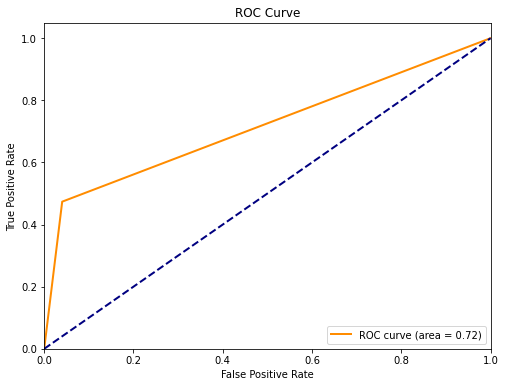

AUC (Area Under the ROC Curve): 0.7166808149405772


In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

actual_labels = data['class']
predicted_probabilities = [0 if label == 0 else 1 for label in data['scored.class']]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities) #The thresholds variable contains the different classification thresholds used to calculate fpr and tpr

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print("AUC (Area Under the ROC Curve):", roc_auc)


AUC = 1.0 (I created without using primary function):

An AUC of 1.0 indicates a perfect classifier. It means that our custom ROC curve perfectly separates the positive and negative classes across all possible thresholds, resulting in a flawless model. This is highly unusual and suggests that there might be an issue with our custom ROC curve or the data used for evaluation.
AUC (Area Under the ROC Curve): ~0.7167 (Scikit-Learn):

An AUC of approximately 0.7167 suggests that the scikit-learn ROC curve represents a classifier that performs reasonably well but is not perfect. It means that the model distinguishes between positive and negative cases, but there is room for improvement.